# Video Game Sales Data Dleaning and Analysis Project

## Loading Data

In [2]:
# importing appropriate libraries for this projct
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
vgsales = pd.read_csv('vgsales.csv') # read the vgsales csv file into a data frame called vgsales
vgsales.head() # print the first 5 rows in vgsales dataframe

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Cleaning Data

In [18]:
vgsales.info() # look at the data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
vgsales.isnull().sum() # count the number of missing values in each column

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
vgsales_cleaned = vgsales.dropna() # drop rows with missing values 
vgsales_cleaned.isnull().sum() # missing values checked to ensure they have been removed

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [22]:
duplicate_rows = vgsales_cleaned[vgsales_cleaned.duplicated()] #look up duplicated rows
duplicate_rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [14]:
vgsales_cleaned.loc[:, 'Year'] = vgsales_cleaned['Year'].astype(int) # change the data type of Year column from float to int
vgsales_cleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Visualisation and Analysis

In [16]:
vgsales_cleaned.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [27]:
total_sales = vgsales_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
total_sales

NA_Sales        4327.65
EU_Sales        2406.69
JP_Sales        1284.27
Other_Sales      788.91
Global_Sales    8811.97
dtype: float64

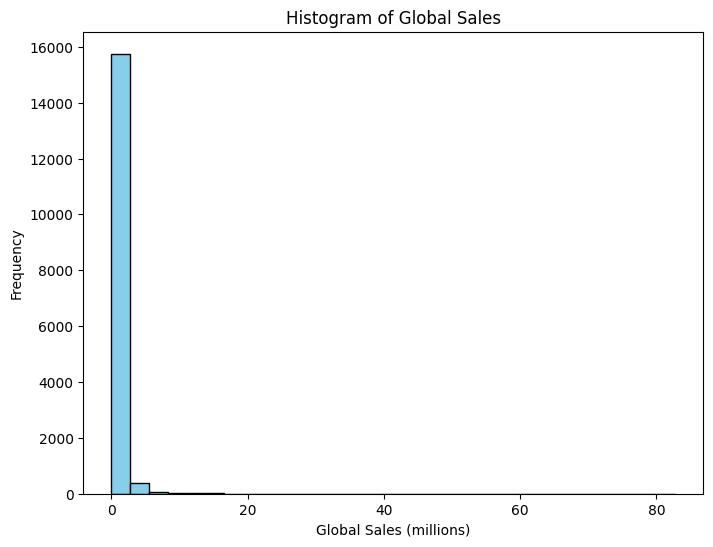

In [36]:
plt.figure(figsize=(8, 6))
plt.hist(vgsales_cleaned['Global_Sales'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.title('Histogram of Global Sales')
plt.show()

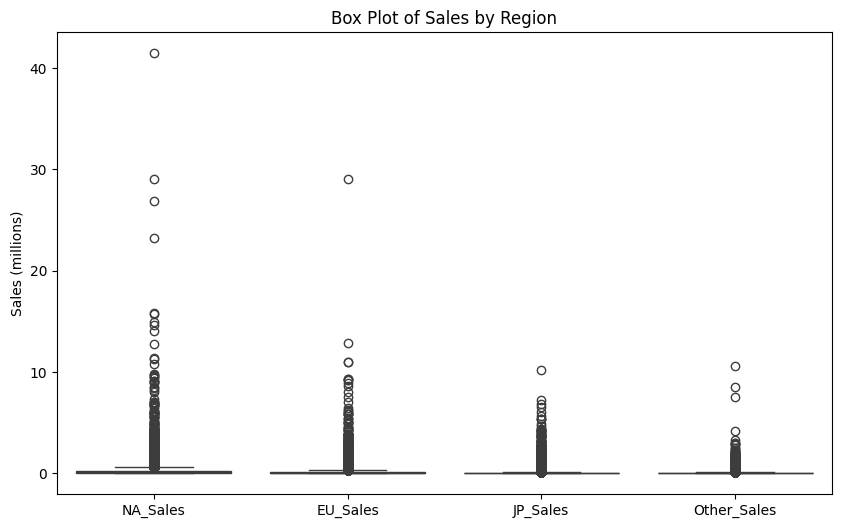

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=vgsales_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
plt.ylabel('Sales (millions)')
plt.title('Box Plot of Sales by Region')
plt.show()

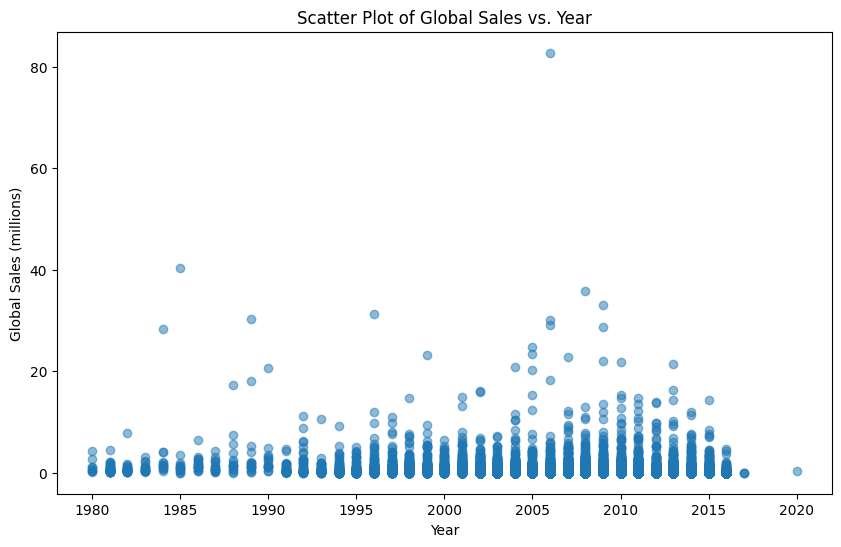

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(vgsales_cleaned['Year'], vgsales_cleaned['Global_Sales'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.title('Scatter Plot of Global Sales vs. Year')
plt.show()

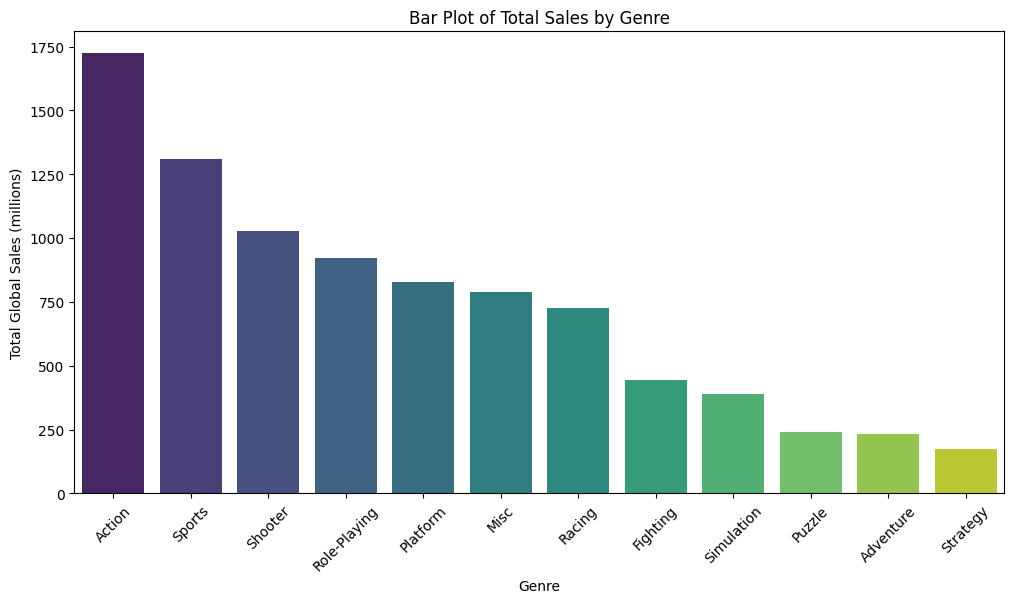

In [34]:
# Create a bar plot of total sales by genre
plt.figure(figsize=(12, 6))
genre_sales = vgsales_cleaned.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales.index, y=genre_sales.values, hue=genre_sales.index, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (millions)')
plt.title('Bar Plot of Total Sales by Genre')
plt.show()

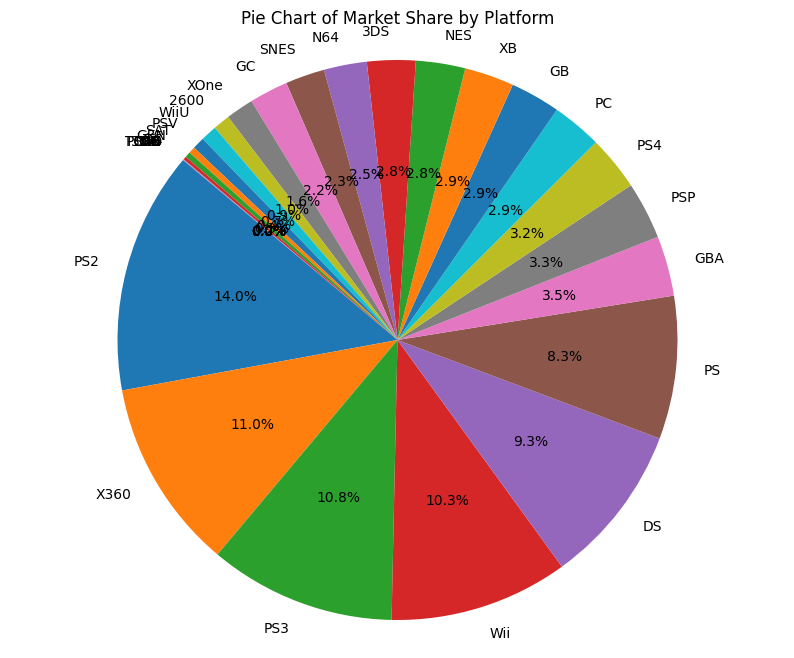

In [37]:
plt.figure(figsize=(10, 8))
platform_sales = vgsales_cleaned.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.pie(platform_sales, labels=platform_sales.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Market Share by Platform')
plt.show()

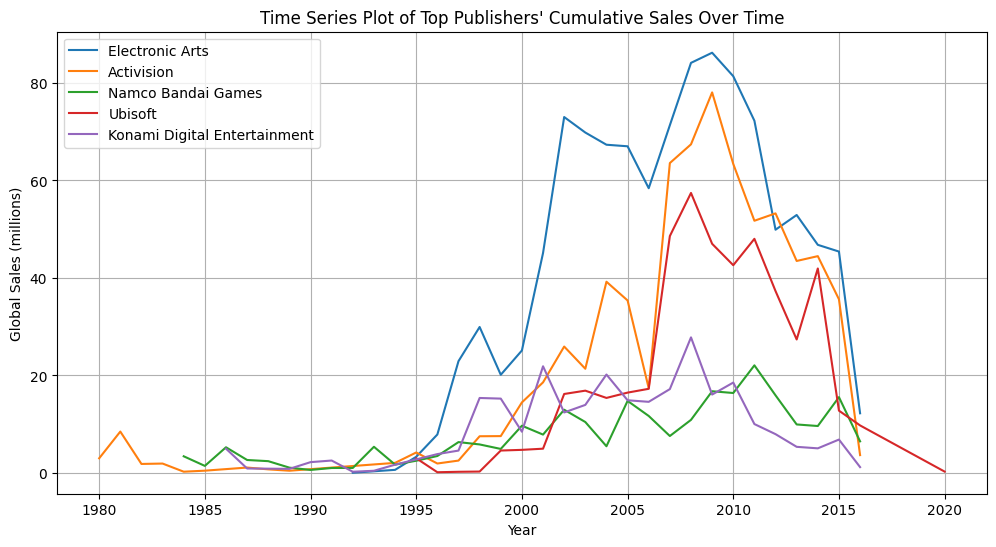

In [56]:
# Get top publishers
top_publishers = vgsales_cleaned['Publisher'].value_counts().head(5).index

# Plot time series chart for top publishers' sales over time
plt.figure(figsize=(12, 6))
for publisher in top_publishers:
    sales_by_publisher = vgsales_cleaned[vgsales_cleaned['Publisher'] == publisher]
    sales_over_time = sales_by_publisher.groupby('Year')['Global_Sales'].sum()
    plt.plot(sales_over_time.index, sales_over_time, label=publisher)

plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.title('Time Series Plot of Top Publishers\' Cumulative Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Conclusions